## Here We have done Data Loading, Prepocessing and Visualisation

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [2]:
dataset= pd.read_csv("antibiotics_animals_final.csv")

In [3]:
dataset

,Sl No.,Antibiotic Class,Antibiotic,Animal,Breed,Dose (mg/kg),Successive Dose Interval
0,1,Aminoglycosides,Gentamycin,Poultry,Dindigul,2.5-5,24 hours
1,2,Penicillins,Amoxicillin,Sheep and Goats,Marwari,10,12-24 hours
2,3,Penicillins,Ampicillin trihydrate,Dairy Cattle/Buffaloes,Sahiwal,4.4-11,12 hours
3,4,Sulfonamides,Sulfaethoxypyridazine,Sheep and Goats,Marwari,55,24 hours
4,5,Sulfonamides,Sulfamethazine,Poultry,Dindigul,134-195,24 hours
...,...,...,...,...,...,...,...
94,94,Fluoroquinolones,Levofloxacin,Dairy Cattle/Buffaloes,Gir,4,24 hours
95,95,Sulfonamides,Sulfaethoxypyridazine,Sheep and Goats,Jamunapari,55,24 hours
96,96,Sulfonamides,Sulfamethazine,Poultry,Aseel,134-195,24 hours
97,97,Quinolones,Enrofloxacin,Poultry,Dindigul,10,24 hours


In [8]:
dataset = dataset.drop('Sl No.', axis=1)

In [9]:
dataset

,Antibiotic Class,Antibiotic,Animal,Breed,Dose (mg/kg),Successive Dose Interval
0,Aminoglycosides,Gentamycin,Poultry,Dindigul,2.5-5,24 hours
1,Penicillins,Amoxicillin,Sheep and Goats,Marwari,10,12-24 hours
2,Penicillins,Ampicillin trihydrate,Dairy Cattle/Buffaloes,Sahiwal,4.4-11,12 hours
3,Sulfonamides,Sulfaethoxypyridazine,Sheep and Goats,Marwari,55,24 hours
4,Sulfonamides,Sulfamethazine,Poultry,Dindigul,134-195,24 hours
...,...,...,...,...,...,...
94,Fluoroquinolones,Levofloxacin,Dairy Cattle/Buffaloes,Gir,4,24 hours
95,Sulfonamides,Sulfaethoxypyridazine,Sheep and Goats,Jamunapari,55,24 hours
96,Sulfonamides,Sulfamethazine,Poultry,Aseel,134-195,24 hours
97,Quinolones,Enrofloxacin,Poultry,Dindigul,10,24 hours


### Data Processing

In [26]:
import networkx as nx
import re

# Define function to get average dose
def get_avg_dose(dose_str):
    if isinstance(dose_str, str):
        if '-' in dose_str:
            try:
                low, high = map(float, dose_str.split('-'))
                return (low + high) / 2
            except ValueError: return None
        else:
            try: return float(dose_str)
            except ValueError: return None
    return dose_str

# Define function to get average interval in hours
def get_avg_interval_hours(interval_str):
    if isinstance(interval_str, str):
        interval_str = interval_str.lower()
        numbers = [float(n) for n in re.findall(r'[\d\.]+', interval_str)]
        if not numbers:
            return None
        avg_num = sum(numbers) / len(numbers)
        if 'day' in interval_str:
            return avg_num * 24
        return avg_num
    return interval_str

# Apply preprocessing
dataset['avg_dose'] = dataset['Dose (mg/kg)'].apply(get_avg_dose)
dataset['avg_interval_hr'] = dataset['Successive Dose Interval'].apply(get_avg_interval_hours)
dataset.dropna(subset=['avg_dose', 'avg_interval_hr'], inplace=True)

# Set style
sns.set_style("whitegrid")

### Data Visualization

#### 1. Distribution of Antibiotic Classes by Animal (Countplot)

Shows how frequently each antibiotic class is used in different animals.

Helps identify which classes are most common for poultry, dairy cattle, sheep, and goats.

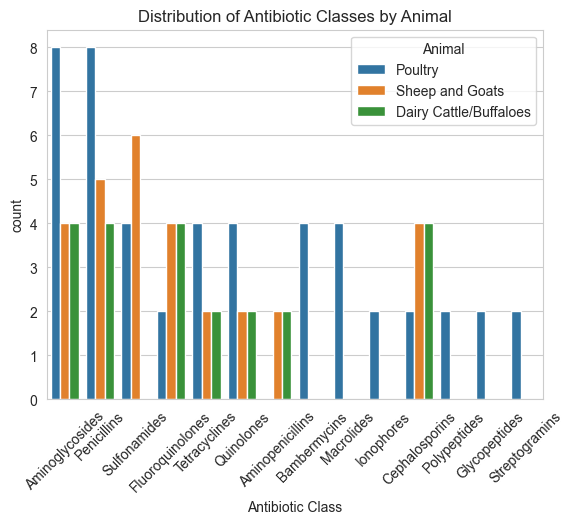

In [27]:
sns.countplot(data=dataset, x="Antibiotic Class", hue="Animal")
plt.xticks(rotation=45)
plt.title("Distribution of Antibiotic Classes by Animal")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7392\3279212620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(


Generated '5_interval_frequency_countplot.png'


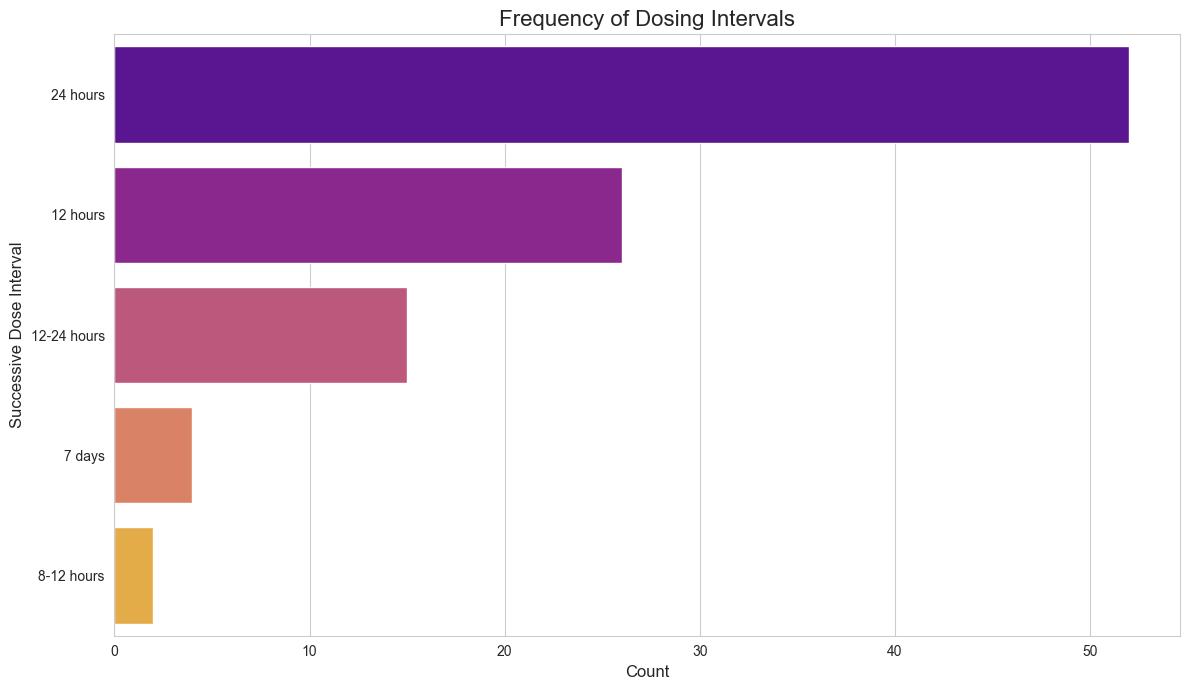

In [ ]:
# Categorical Comparison - Dosing Interval Frequency
plt.figure(figsize=(12, 7))
ax1 = sns.countplot(
    y='Successive Dose Interval',
    data=dataset,
    order=dataset['Successive Dose Interval'].value_counts().index,
    palette='plasma'
)
ax1.set_title('Frequency of Dosing Intervals', fontsize=16)
ax1.set_xlabel('Count', fontsize=12)
ax1.set_ylabel('Successive Dose Interval', fontsize=12)
plt.tight_layout()
plt.savefig('5_interval_frequency_countplot.png')
print("Generated '5_interval_frequency_countplot.png'")

#### Heatmap of Antibiotic Usage Across Animals
Visualizes overlap of antibiotics between different animals.

Highlights which antibiotics are shared across multiple species and which are unique.

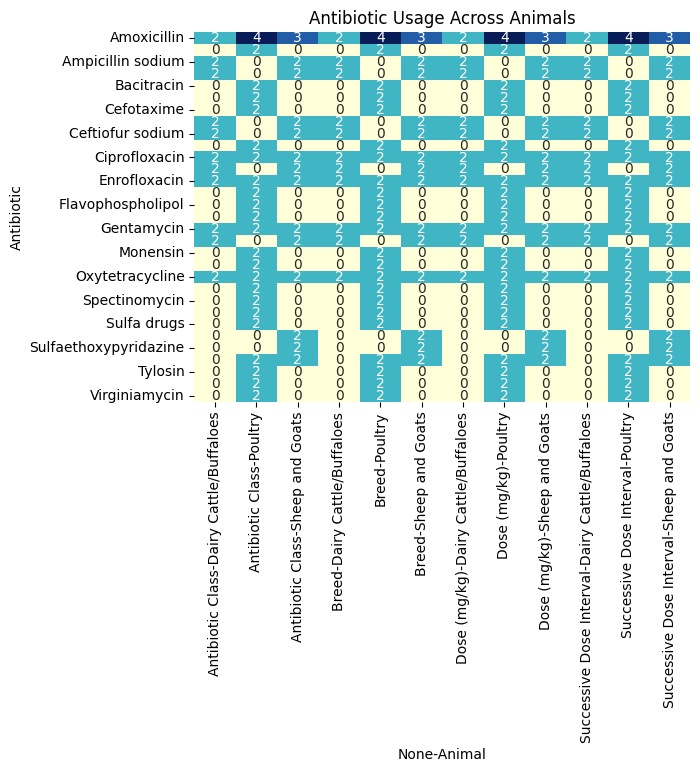

In [17]:
pivot = dataset.pivot_table(index="Antibiotic", columns="Animal", aggfunc="count", fill_value=0)
sns.heatmap(pivot, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Antibiotic Usage Across Animals")
plt.show()

Generated '6_animal_class_network.png'


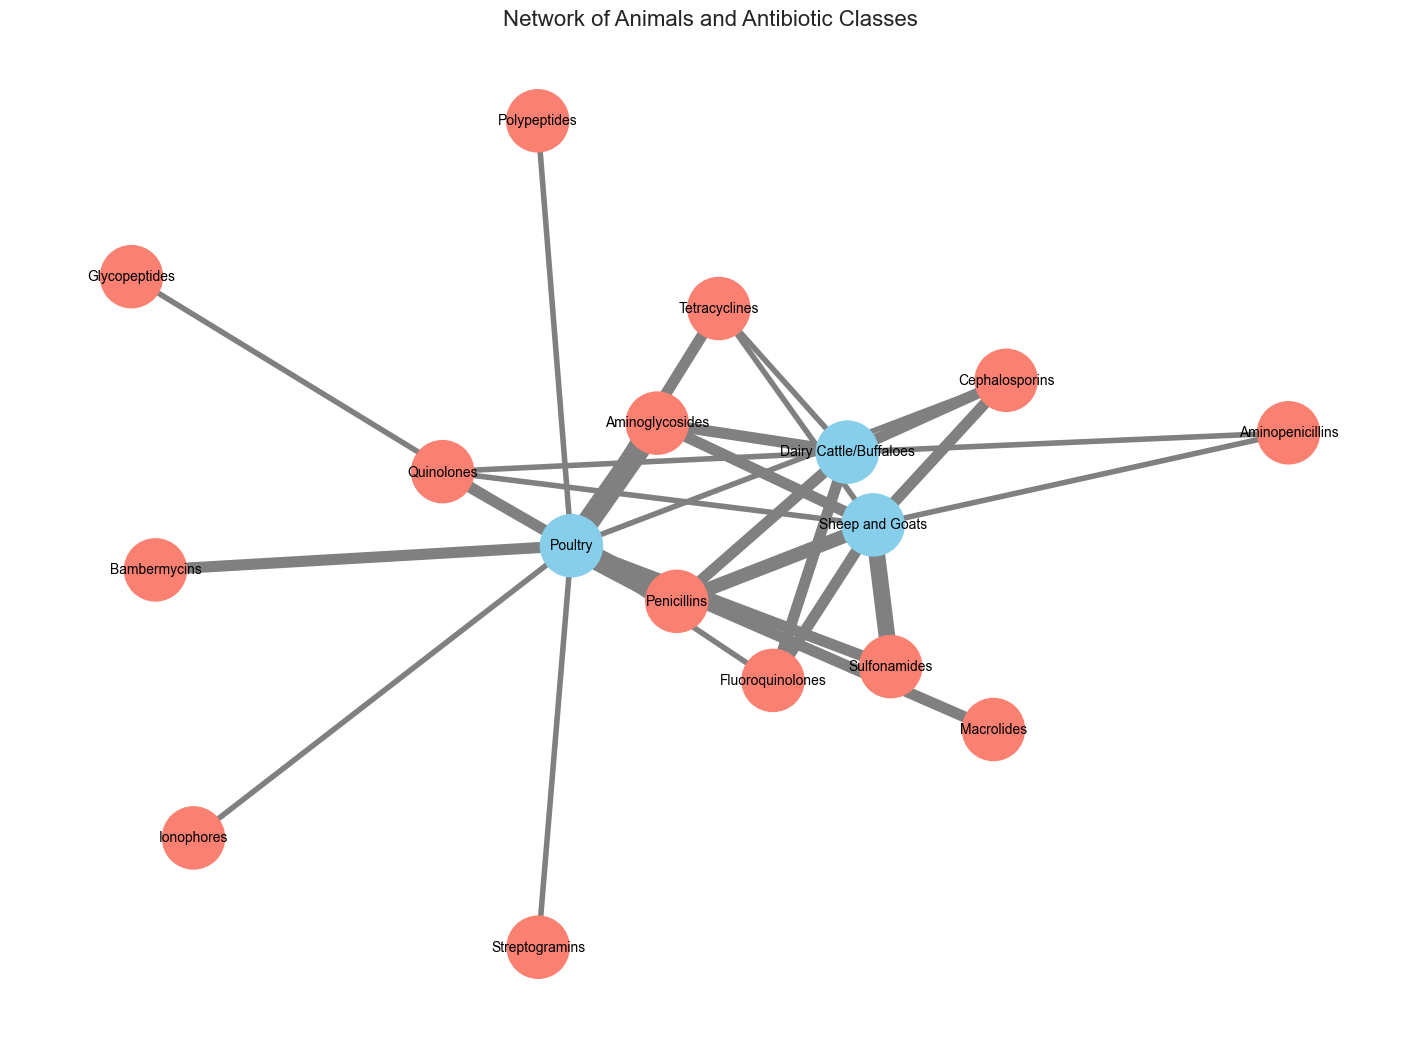

In [ ]:
# Cross-Animal Relationships - Network Graph
plt.figure(figsize=(14, 10))
crosstab = pd.crosstab(dataset['Animal'], dataset['Antibiotic Class'])
G = nx.Graph()
for animal in crosstab.index:
    G.add_node(animal, type='animal')
for ab_class in crosstab.columns:
    G.add_node(ab_class, type='class')

edges = []
for animal in crosstab.index:
    for ab_class in crosstab.columns:
        count = crosstab.loc[animal, ab_class]
        if count > 0:
            edges.append((animal, ab_class, {'weight': count}))
G.add_edges_from(edges)

pos = nx.spring_layout(G, k=0.8, seed=42)
weights = [G[u][v]['weight'] * 2 for u, v in G.edges()]
node_colors = ['skyblue' if G.nodes[n]['type'] == 'animal' else 'salmon' for n in G.nodes()]

nx.draw(G, pos, with_labels=True, node_size=2000, node_color=node_colors, font_size=10, width=weights, edge_color='gray')
plt.title('Network of Animals and Antibiotic Classes', fontsize=16)
plt.savefig('6_animal_class_network.png')
print("Generated '6_animal_class_network.png'")

#### Network Graph: Antibiotic Usage Across Animals

Bipartite graph linking animals (left) to antibiotics (right).

Shows relationships between species and shared antibiotics.

Useful for quickly spotting antibiotics that are widely used vs. species-specific.

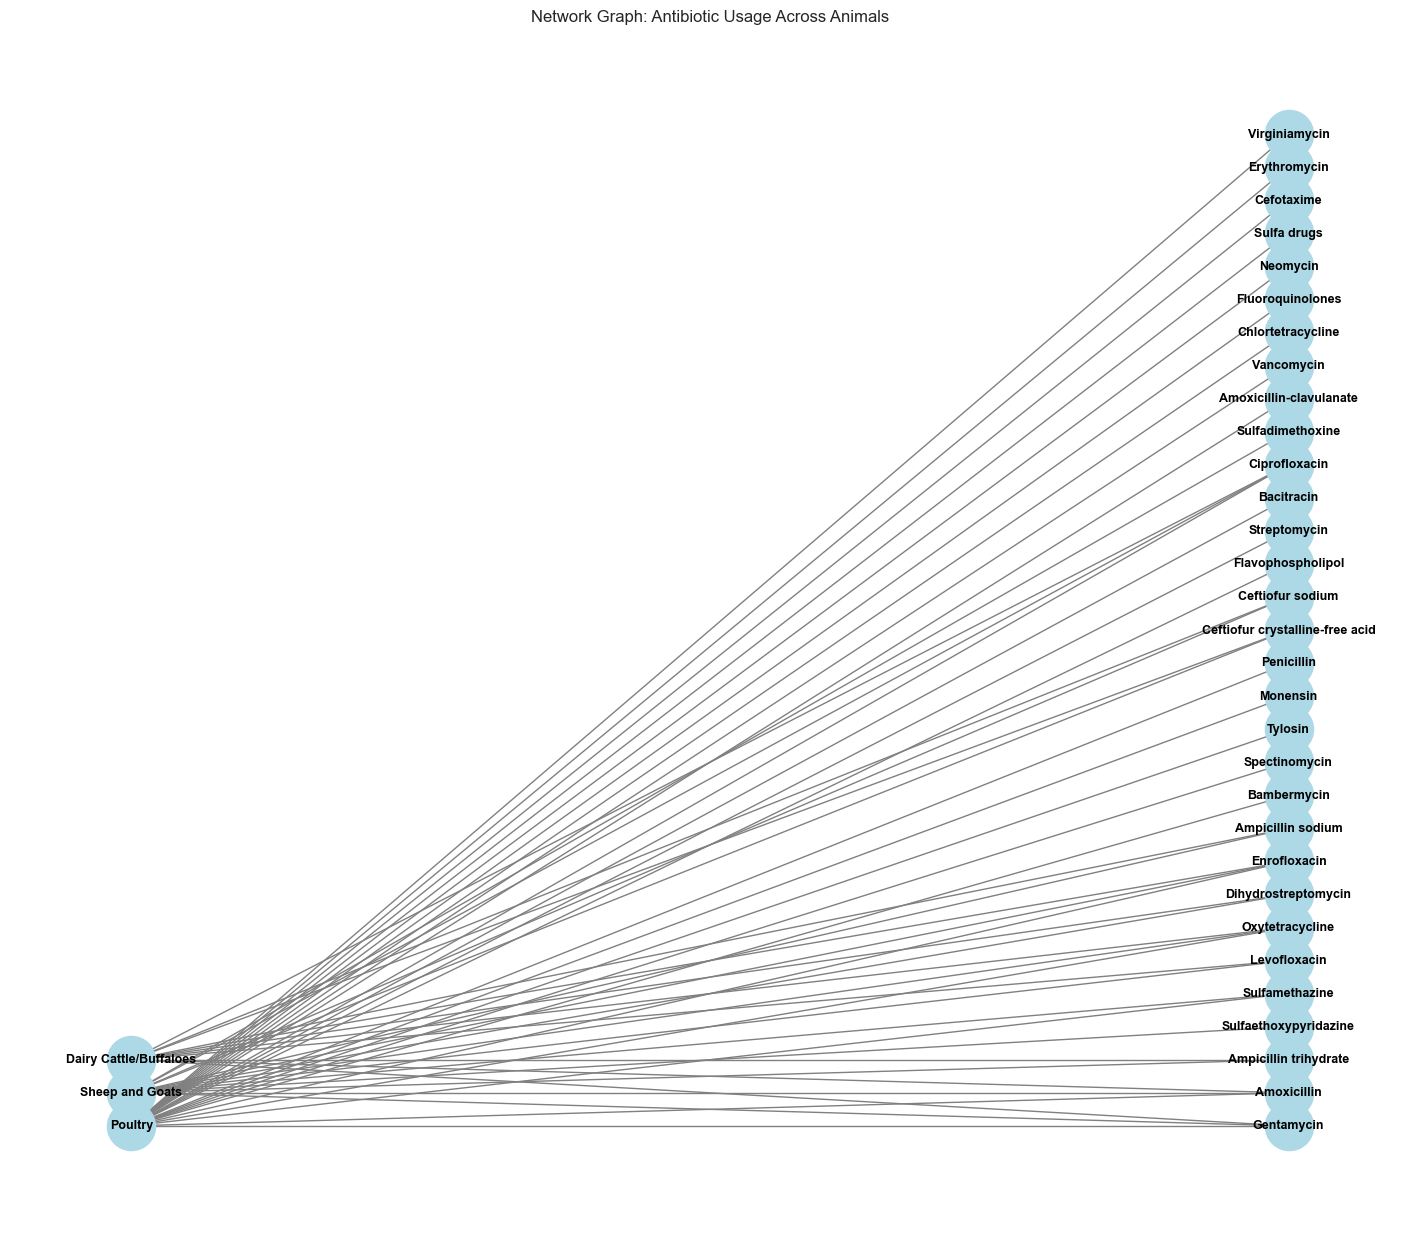

In [35]:
# Create bipartite graph: Animals ↔ Antibiotics
G = nx.Graph()

# Add nodes
animals = dataset["Animal"].unique()
antibiotics = dataset["Antibiotic"].unique()

G.add_nodes_from(animals, bipartite=0)       # Animal group
G.add_nodes_from(antibiotics, bipartite=1)   # Antibiotic group

# Add edges
for _, row in dataset.iterrows():
    G.add_edge(row["Animal"], row["Antibiotic"])

# Layout: bipartite positioning
pos = {}
pos.update((node, (1, i)) for i, node in enumerate(animals))        # Animals on left
pos.update((node, (2, i)) for i, node in enumerate(antibiotics))    # Antibiotics on right

# Draw
plt.figure(figsize=(14, 12))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1200, font_size=9, font_weight="bold", edge_color="gray")
plt.title("Network Graph: Antibiotic Usage Across Animals")
plt.show()

#### Average Successive Dose Interval by Antibiotic Class (Barplot)

Converts dosing intervals into numeric hours for comparison.

Displays average dosing gaps class-wise, separated by animal type.

Useful to understand which antibiotics require more frequent or less frequent dosing.

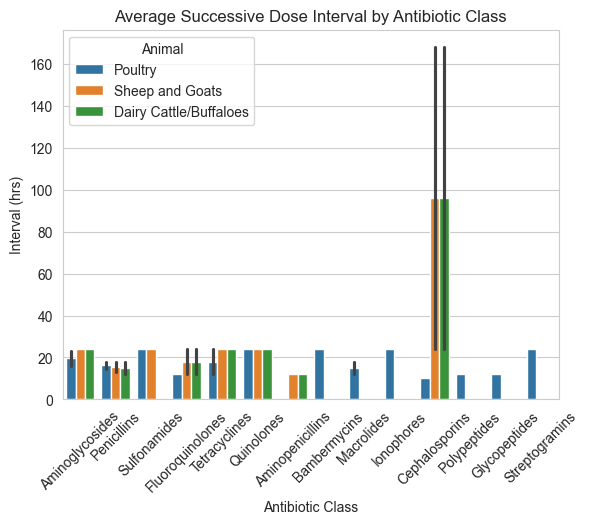

In [ ]:
# Convert intervals into approximate numeric hours
def interval_to_hours(x):
    if "-" in x:
        low, high = x.replace(" hours", "").split("-")
        return (float(low) + float(high)) / 2
    elif "day" in x:
        return float(x.split()[0]) * 24
    else:
        return float(x.replace(" hours", ""))

dataset["Interval (hrs)"] = dataset["Successive Dose Interval"].apply(interval_to_hours)

sns.barplot(data=dataset, x="Antibiotic Class", y="Interval (hrs)", hue="Animal", estimator="mean")
plt.xticks(rotation=45)
plt.title("Average Successive Dose Interval by Antibiotic Class")
plt.show()

#### Top Antibiotics Used per Animal (Countplot)

Ranks antibiotics by their frequency of occurrence.

Provides insight into the most prescribed antibiotics across different animals.

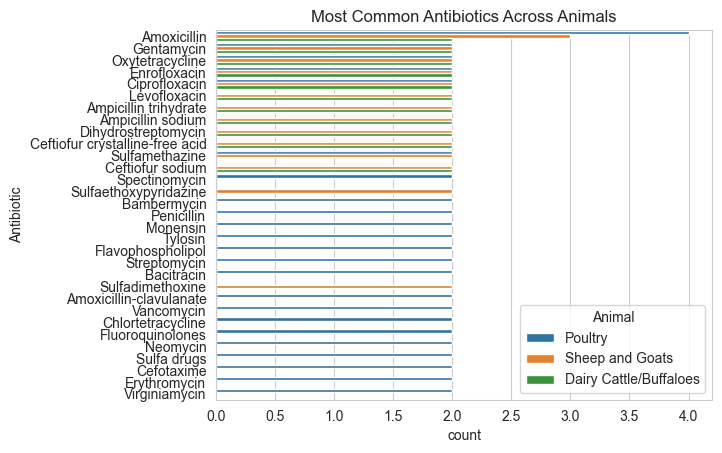

In [ ]:
# Top Antibiotics Used per Animal
sns.countplot(data=dataset, y="Antibiotic", hue="Animal", order=dataset["Antibiotic"].value_counts().index)
plt.title("Most Common Antibiotics Across Animals")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7392\2255943653.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


Generated '7_breed_comparison_violinplot.png'


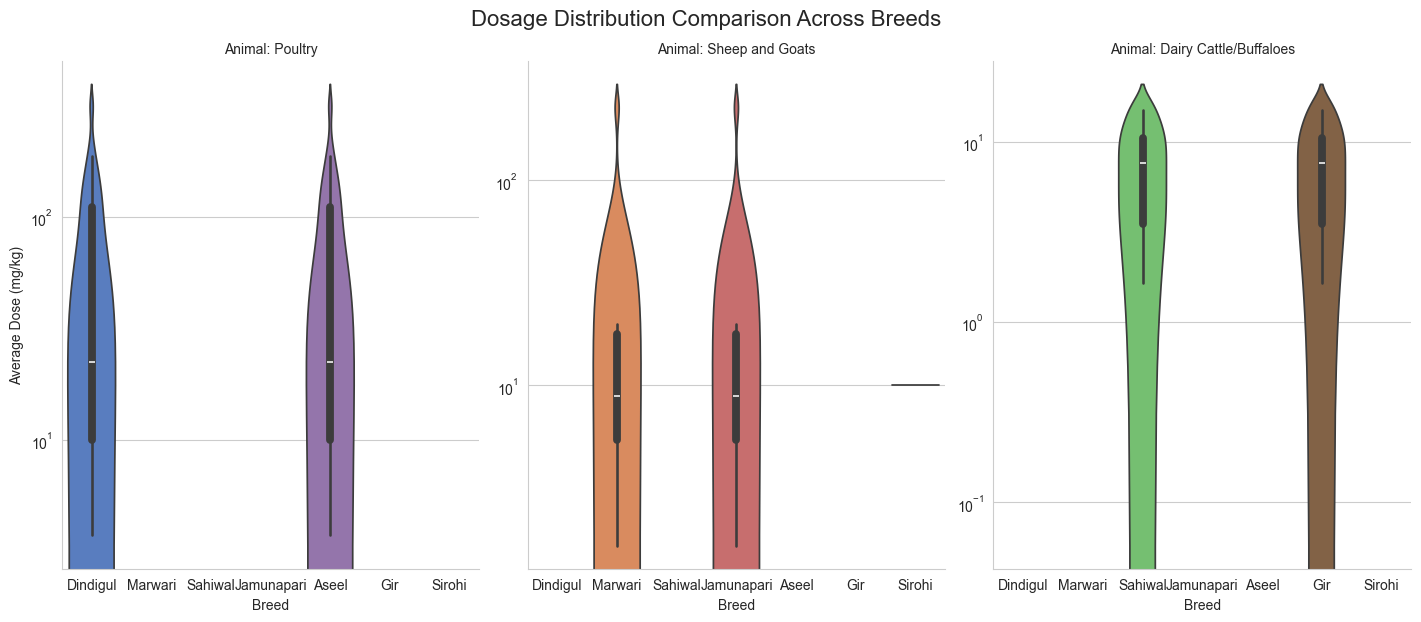

In [ ]:
# Cross-Breed Comparison - Dosage Distribution
g = sns.catplot(
    data=dataset,
    x='Breed',
    y='avg_dose',
    col='Animal',
    kind='violin',
    sharey=False, # Allow y-axis to be different for each plot
    palette='muted',
    height=6,
    aspect=0.8
)
g.fig.suptitle('Dosage Distribution Comparison Across Breeds', y=1.03, fontsize=16)
g.set_titles("Animal: {col_name}")
g.set_axis_labels("Breed", "Average Dose (mg/kg)")
# Set y-axis to log scale for better visualization
for ax in g.axes.flat:
    ax.set_yscale('log')
plt.savefig('7_breed_comparison_violinplot.png')
print("Generated '7_breed_comparison_violinplot.png'")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7392\783488550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax4 = sns.barplot(


Generated '8_avg_interval_barchart.png'


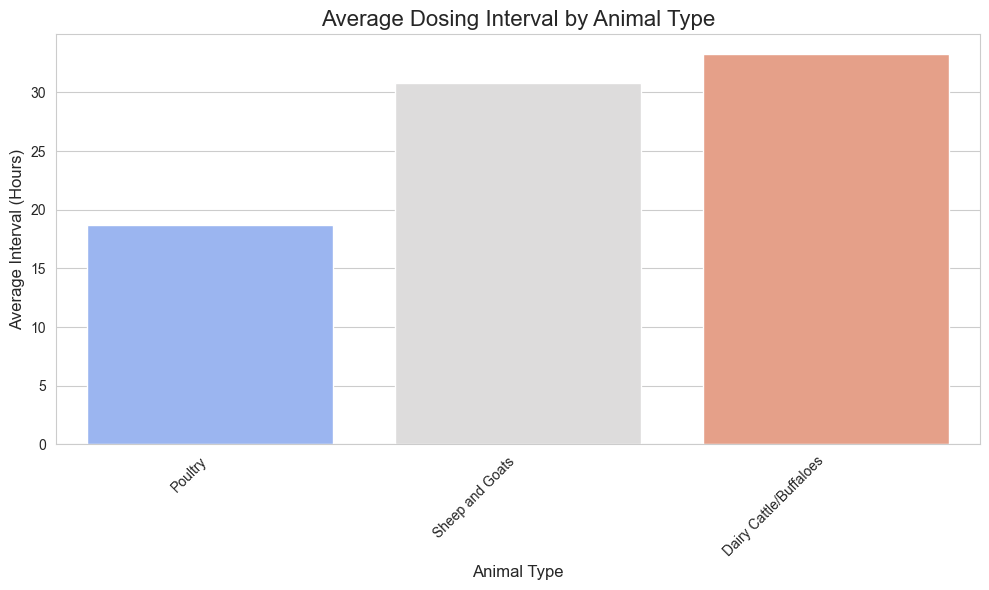

In [ ]:
# Dosage Interval Analysis - Average Interval by Animal
plt.figure(figsize=(10, 6))
ax4 = sns.barplot(
    x='Animal',
    y='avg_interval_hr',
    data=dataset,
    order=dataset.groupby('Animal')['avg_interval_hr'].mean().sort_values().index,
    palette='coolwarm',
    errorbar=None
)
ax4.set_title('Average Dosing Interval by Animal Type', fontsize=16)
ax4.set_xlabel('Animal Type', fontsize=12)
ax4.set_ylabel('Average Interval (Hours)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('8_avg_interval_barchart.png')
print("Generated '8_avg_interval_barchart.png'")